In [1]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

import sys
import os

# path = "C:/Users/meide/Documents/GitHub/Master/data"
path = "data/"
os.chdir(path)

ModuleNotFoundError: No module named 'sklearn'

# Import your dataset of choice

In [3]:
dfCore = pd.read_csv("chemical_properties_e_coli_core.csv")
# df1515_2 = pd.read_csv("Chemical_properties1515.csv")
# df1515_2 = pd.read_csv("https://raw.githubusercontent.com/meidelien/Metabolic-network-layout-using-biochemical-coordinates/main/data/Chemical_descriptors1515.csv", usecols=[2,5,6] + list(range (10,218)), index_col=0)
#df1515_2 = pd.read_csv("https://raw.githubusercontent.com/meidelien/Metabolic-network-layout-using-biochemical-coordinates/main/Notebooks/Chemical_descriptors1515.csv")
# dfID = pd.read_csv("https://raw.githubusercontent.com/meidelien/Metabolic-network-layout-using-biochemical-coordinates/main/data/Chemical_descriptors1515.csv")
# df1515 = pd.read_csv("https://raw.githubusercontent.com/meidelien/Metabolic-network-layout-using-biochemical-coordinates/main/data/1515_for_PCA.csv")


# df1515 = pd.read_csv("Calc_results.csv")

df1515 = pd.read_csv("Pruned_chem_desc1515_for_PCA.csv")

# BiGG = pd.read_csv("https://raw.githubusercontent.com/meidelien/Metabolic-network-layout-using-biochemical-coordinates/main/data/BiGG_mnxm2.csv")


In [3]:
import numpy as np

# df1515.replace(np.nan, 0) # fml

df1515["BCUT2D_MWHI"] = df1515["BCUT2D_MWHI"].replace(np.nan, 0)

df1515["BCUT2D_MWLOW"] = df1515["BCUT2D_MWLOW"].replace(np.nan, 0)

df1515["BCUT2D_CHGHI"] = df1515["BCUT2D_CHGHI"].replace(np.nan, 0)

df1515["BCUT2D_LOGPHI"] = df1515["BCUT2D_LOGPHI"].replace(np.nan, 0)

df1515["BCUT2D_LOGPLOW"] = df1515["BCUT2D_LOGPLOW"].replace(np.nan, 0)

df1515["BCUT2D_CHGLO"] = df1515["BCUT2D_CHGLO"].replace(np.nan, 0)

df1515["BCUT2D_MRHI"] = df1515["BCUT2D_MRHI"].replace(np.nan, 0)

df1515["BCUT2D_MRLOW"] = df1515["BCUT2D_MRLOW"].replace(np.nan, 0)

df1515["MaxPartialCharge"] = df1515["MaxPartialCharge"].replace(np.nan, 0)

df1515["MinPartialCharge"] = df1515["MinPartialCharge"].replace(np.nan, 0)

df1515["MaxAbsPartialCharge"] = df1515["MaxAbsPartialCharge"].replace(np.nan, 0)

df1515["MinAbsPartialCharge"] = df1515["MinAbsPartialCharge"].replace(np.nan, 0)

## Pop out the MNXM & BiGG columns before data transformation & plotting

In [4]:
MNXM_list = df1515.pop("MNXM")
BiGG_list = df1515.pop("BiGG")

### Plotting components
- `PCA plotting parameters`

 ```python:
number_components = 20 # The number of components to plot. Cannot exceed the num of features in the imported dataset

legend = variable # Changes which list or column feature to color data points as
```
- Legend variable examples 
- - BiGG_list
  - df1515["mass"]


- Will save HTML plots in a folder called "Plotly images" 

In [5]:
import plotly.express as px
import kaleido as kd
import os
import numpy as np
import plotly.io as pio
import time
start_time = time.time()

pio.kaleido.scope.default_format = "svg"


# Lists RDkit computed features
features = df1515.columns.values.tolist()

# Remove the Name column from the feature list
features.pop(0) 



xx = df1515.loc[:,df1515.columns].values # Get computed values from each feature
xx = StandardScaler().fit_transform(df1515[features]) # Normalize data 
df = pd.DataFrame(xx, columns = features)  # Stitch it back together
pca = PCA() # Instantiate PCA class,

components = pca.fit_transform(df[features])    # 
labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}

####### PARAMETERS ####### 
#  number_components 
#
#  legend
#  
#######  #######   #######  
number_components = 20
legend = BiGG_list

fig = px.scatter_matrix(
    components,
    labels = labels,
    dimensions = range(number_components),  # Number of component, for the PCA set, linear behavior comes on component 5 (for the GEM) and gives descriptive (~ 80 %)
    color = legend,  # Sets what each metabolite is colored by (<numerical feature> for gradient  & "Name" for labelling each metabolite as a  )
    title = f"Principal component analysis for metabolites in the iML1515 GEM <br><sup>{number_components} components</sup>", #  Sets title, allows some html formatting tags
 
)

# Centers title
fig.update_layout(title_x=0.5)


fig.update_traces(diagonal_visible=False)
fig.update_layout (
    width = 2560,
    height = 1440
)


# Changes the legend string
fig.update_layout( 
    legend=dict(
        title = "Metabolites", 
    )
)


# fig.add_annotation( # add a text callout with arrow
   # text= "big boi!", x="NADH", arrowhead=1, showarrow=True
# )

# Write_png() requires kaleido

print("Attempting to write html GLHF %s" % (time.time() - start_time))

fig.write_html(f"Plotly images\PCA_{number_components}_test.html")
# fig.write_html(f"Plotly images\PCA_{number_components}_components_4K_MASS.html")

print("HTMl write successful %s" % (time.time() - start_time))



# fig.show()



# print("Attempting to write image GLHF %s" % (time.time() - start_time))

# fig.write_image(f"Plotly images\PCA_{number_components}_components_5K.svg", engine = "kaleido")

# print("Image write successful %s" % (time.time() - start_time))

# print("Explained variation per principal component: {}".format(pca.explained_variance_ * 100))

Attempting to write html GLHF 7.611066818237305
HTMl write successful 8.157034873962402


In [13]:
import plotly.express as px
import kaleido as kd
import os
import numpy as np
import plotly.io as pio
import time
start_time = time.time()

pio.kaleido.scope.default_format = "svg"


# Lists RDkit computed features
features = dfCore.columns.values.tolist()

# Remove the Name column from the feature list
# features.pop(0) 



xx = dfCore.loc[:,dfCore.columns].values # Get computed values from each feature
xx = StandardScaler().fit_transform(dfCore[features]) # Normalize data 
df = pd.DataFrame(xx, columns = features)  # Stitch it back together
pca = PCA() # Instantiate PCA class,

components = pca.fit_transform(df[features])    # 
labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ *100)
}

####### PARAMETERS ####### 
#  number_components 
#
#  legend
#  
#######  #######   #######  
number_components = 5
legend = dfCore.ExactMolWt

fig = px.scatter_matrix(
    components,
    labels = labels,
    dimensions = range(number_components),  # Number of component, for the PCA set, linear behavior comes on component 5 (for the GEM) and gives descriptive (~ 80 %)
    color = legend,  # Sets what each metabolite is colored by (<numerical feature> for gradient  & "Name" for labelling each metabolite as a  )
    title = f"Principal component analysis for metabolites in the E coli core GEM <br><sup>{number_components} components</sup>", #  Sets title, allows some html formatting tags
 
)

# Centers title
fig.update_layout(title_x=0.5)


fig.update_traces(diagonal_visible=False)
fig.update_layout (
    width = 2560,
    height = 1440
)


# Changes the legend string
fig.update_layout( 
    legend=dict(
        title = "Metabolites", 
    )
)


# fig.add_annotation( # add a text callout with arrow
   # text= "big boi!", x="NADH", arrowhead=1, showarrow=True
# )

# Write_png() requires kaleido

print("Attempting to write html GLHF %s" % (time.time() - start_time))

fig.write_html(f"Plotly images\PCA_{number_components}_test.html")
# fig.write_html(f"Plotly images\PCA_{number_components}_components_4K_MASS.html")

print("HTMl write successful %s" % (time.time() - start_time))



# fig.show()



# print("Attempting to write image GLHF %s" % (time.time() - start_time))

# fig.write_image(f"Plotly images\PCA_{number_components}_components_5K.svg", engine = "kaleido")

# print("Image write successful %s" % (time.time() - start_time))

# print("Explained variation per principal component: {}".format(pca.explained_variance_ * 100))

Attempting to write html GLHF 0.043993473052978516
HTMl write successful 0.05699419975280762


## For testing purposes: reading only the csv with RDKit numericals

In [6]:
# df2 = pd.read_csv("chemical_properties.csv")
# xx = df.loc[:, df2.columns].values

xx = df1515.loc[:,df1515.columns].values

In [7]:
xx = StandardScaler().fit_transform(xx)

In [8]:
xx.shape

(963, 57)

In [9]:
np.mean(xx)

-1.1261813049703725e-17

In [10]:
np.mean(xx), np.std(xx)

(-1.1261813049703725e-17, 1.0)

In [11]:
feat_cols = ["feature" +str(i) for i in range(xx.shape[1])]

features = df1515.columns.values.tolist()
feat_cols_name = [df1515.columns]

In [12]:
feat_cols_name = [df1515.columns]
# print(feat_cols_name)


In [13]:
normalized_descriptors = pd.DataFrame(xx, columns = features)

In [14]:
normalized_descriptors.insert(0, "BiGG", BiGG_list)

In [15]:
normalized_descriptors.insert(1, "MNXM", MNXM_list)

In [16]:
normalized_descriptors.to_csv("PyvisData_BiGG_MXNM.csv", index = False)

In [ ]:
# 2 components 
# pca_descriptors = PCA(n_components= 2)

# 4 component
 


# Pop out columns containing strings pls :))

pca_descriptors = PCA(n_components= 4)

PC_descriptors = pca_descriptors.fit_transform(normalized_descriptors)

In [22]:
pca_descriptors

PCA(n_components=4)

In [17]:
# 2 Components
PC_df = pd.DataFrame(data= PC_descriptors, columns= ["PC1", "PC2"])

# 4 components
# principal_descriptors_df = pd.DataFrame(data= PC_descriptors, columns= ["PC1", "PC2", "PC3", "PC4"])

(-5.0, 15.0)

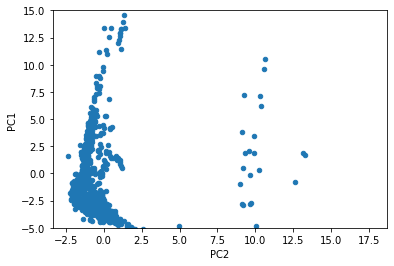

In [18]:
#principal_descriptors_df.tail()
ax  = PC_df.plot.scatter(x = "PC2", y ="PC1")
ax.set_ylim(-5, 15)


In [5]:
print("Explained variation per principal component: {}".format(pca_descriptors.explained_variance_))

NameError: name 'pca_descriptors' is not defined

In [ ]:
# a =  63.53175376 +  12.87115987 # + 10.33669742 + 9.44759513 #34.16290627 +  7.7769594
a = 34.16290627 + 7.7769594 +  2.92142128 + 2.40747469
a

47.26876164

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd


x  = PC_descriptors["PC1"]
y  = PC_descriptors["PC2"]

plt.scatter(x[:1], x[:,2], c=y)


plt.show()

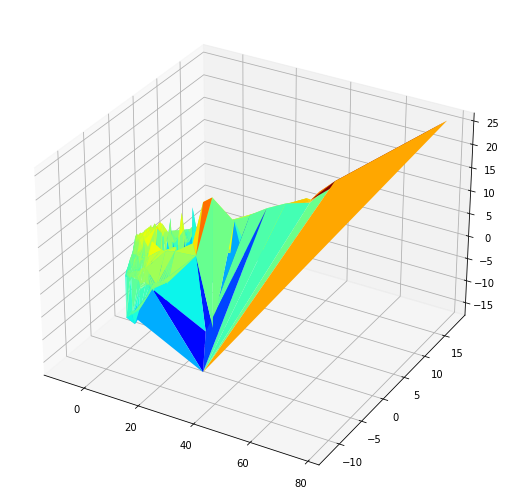

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D
import plotly
fig = plt.figure(figsize=(14, 9))
ax = plt.axes(projection="3d")

ax.plot_trisurf(PC_descriptors.PC1, PC_descriptors, PC_descriptors, cmap=cm.jet, linewidth=0.2,antialiased = True)
plt.show()

In [ ]:
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt

x = dfPCA.values

# Scale large vals
x = StandardScaler().fit_transform(x)

pca_2 = PCA(n_components = 2)

X_r = pca_2.fit_transform(scale(x)).T